In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('multiple_linear_regression.csv')

In [4]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [20]:
df.isna().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

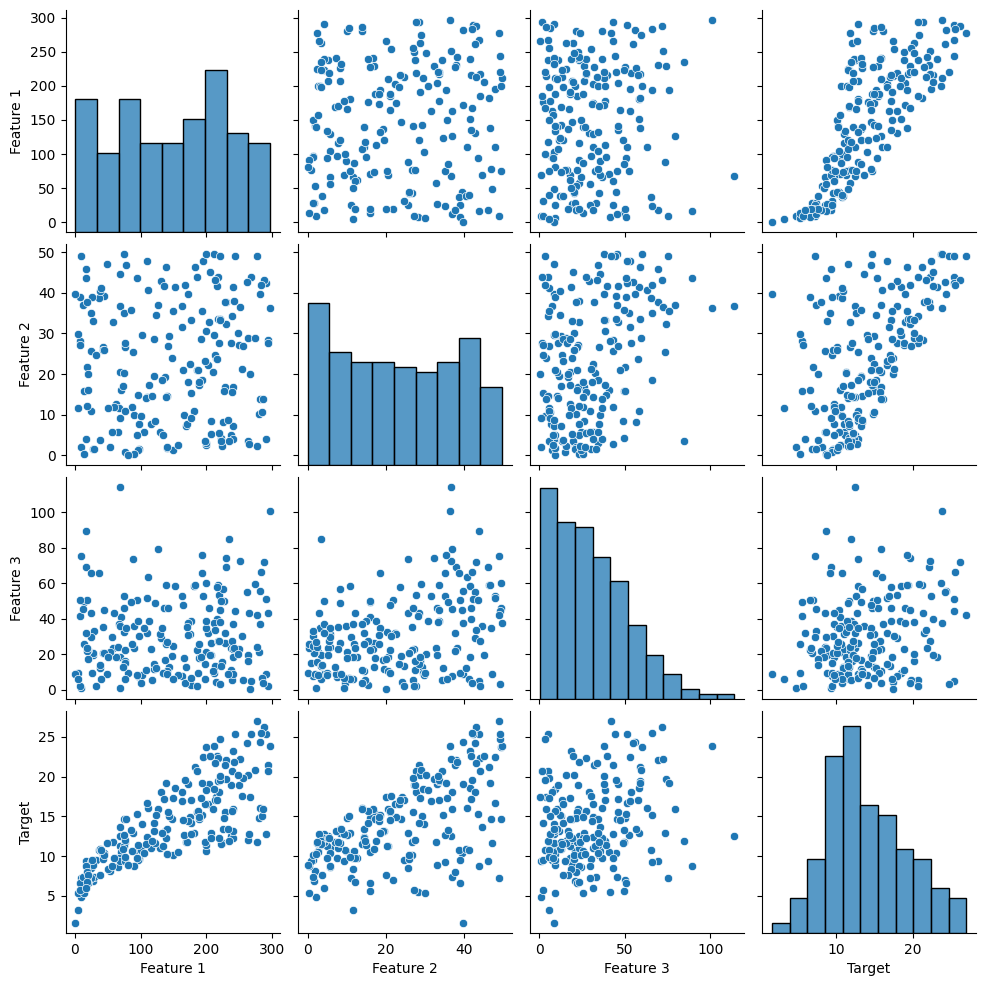

In [5]:
sns.pairplot(df)

<Axes: xlabel='Feature 1', ylabel='Count'>

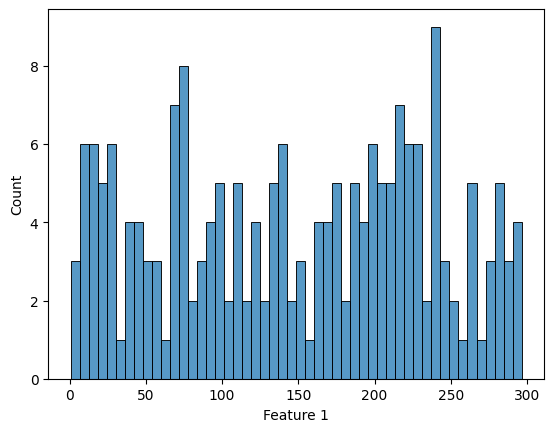

In [9]:
sns.histplot(df,x='Feature 1',bins=50)

<Axes: xlabel='Feature 2', ylabel='Count'>

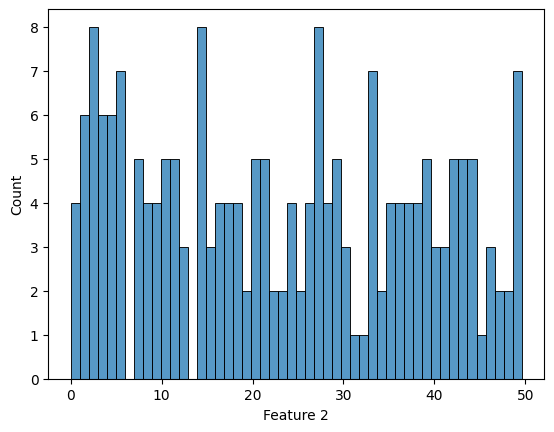

In [10]:
sns.histplot(df,x='Feature 2',bins=50)

<Axes: xlabel='Feature 3', ylabel='Count'>

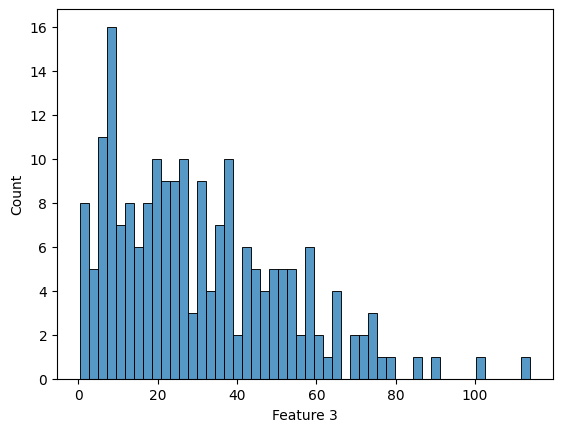

In [11]:
sns.histplot(df,x='Feature 3',bins=50)

<Axes: >

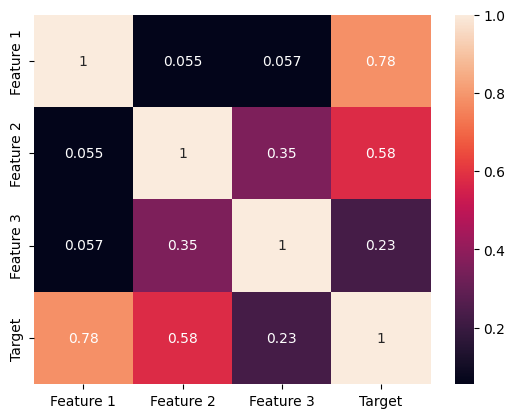

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
import statsmodels.api as sm
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
model = sm.OLS(Y, X).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Target   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):                   2.43e-171
Time:                        12:23:26   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Feature 1      0.0538      0.001     40.507      0.000       0.051       0.056
Feature 2      0.2222      0.009     23.595      0.000       0.204       0.241
Feature 3      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#using all three variables
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [18]:
lr.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [19]:
lr.intercept_

2.979067338122629

In [24]:
prediction = lr.predict(xtest) 

In [25]:
d = {'ytest':ytest,'predicted':prediction}
results = pd.DataFrame(d)
results

,ytest,predicted
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373
115,12.6,13.105592
69,22.3,21.057192
170,8.4,7.461010
174,11.5,13.606346
45,14.9,15.155070


In [26]:
#evaluate model performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(ytest,prediction)
mse = mean_squared_error(ytest,prediction)
rmse = np.sqrt(mse)
mae,mse,rmse

(1.4607567168117603, 3.1740973539761033, 1.78159966153345)

In [30]:
#model without feature 3
#using all three variables
X= df.iloc[:,:-2]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)
xtrain.shape,ytrain.shape

((160, 2), (160,))

In [31]:
lr2 = LinearRegression()
lr2.fit(xtrain,ytrain)

LinearRegression()

In [32]:
prediction = lr2.predict(xtest)

In [33]:
d = {'ytest':ytest,'predicted':prediction}
results = pd.DataFrame(d)
results

,ytest,predicted
95,16.9,16.357473
15,22.4,20.862994
30,21.4,21.525058
158,7.3,10.587198
128,24.7,22.224596
115,12.6,13.060705
69,22.3,21.095644
170,8.4,7.476411
174,11.5,13.624098
45,14.9,15.150194


In [34]:
#evaluate model performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(ytest,prediction)
mse = mean_squared_error(ytest,prediction)
rmse = np.sqrt(mse)
mae,mse,rmse

(1.4443023138227578, 3.137948009068354, 1.7714254173033517)